# Predicting Used-Car Prices using Linear Regression
#### By [Jeremiah Gerodias](https://www.linkedin.com/in/jgerodias/)

<br>The goal for this project is to build a Linear Regression model that could predict the price of a second-hand vehicle based on some of its specifications. This model will then be evaluated on how well it predicts the actual prices. 

The dataset provided contains a list of *real* used-car sales records in the US. The following are descriptions of each column in the dataset.

- __Brand__ - The make of the car (*Toyota, Mercedes-Benz, Audi, ...*)
- __Price__ - The price __in USD__ at which the car was sold
- __Body__ - The car's body style (*Sedan, Hatchback, Crossover, ...*)
- __EngineV__ - The engine volume / displacement __in Liters__ 
- __Mileage__ - The car's mileage __in thousands__. A "__0__" mileage means the car was driven for less than a thousand miles
- __EngineType__ - The type of the engine based on the fuel used. (*Diesel, Petrol, Gas, ...*)
- __Registration__ - A __yes/no__ value indicating whether the car had a valid registration at the time of the sale
- __Year__ - The vehicles model year
- __Model__ - The name of the car's model (*RAV4, Camry, Jetta, ...*)


### <br>Importing the Relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style = 'white')

### <br>Loading the Car_Sales.csv Dataset

Let's load the data into our Notebook and immediately make a copy. We will use the copy from this point on.

In [2]:
raw_data = pd.read_csv('Used_Car_Sales.csv')
data = raw_data.copy()

### <br>Quick Dataset Exploration

Let's take a look at the shape of our data set. We have __4,345__ rows & __9__ columns in our data set.

In [3]:
data.shape

(4345, 9)

<br>Let's take a look at the first 5 rows of our data set to see what type values we have in each column. Specifically, I want to see how many numeric variables and how many categorical variables we have. It looks like we have __4 numeric variables__ (*Price, Mileage, EngineV,* and *Year*), and __5 categorical variables__ (*Brand, Body, Engine Type, Registration,* and *Model*).

In [4]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


<br>Let's take a look at the descriptive statistics of each of the column in the data set by running the following line of code. The first thing that stands out to me in following table is the __count__ row. The numbers are not all the same; meaning that we have NULL values in our dataset. Specifically, it appears that we have NULL values in the *Price* and *EngineV* columns.

In [5]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### <br>Removing NULL rows

The following heatmap shows __where the NULL__ values are in our dataset. The yellow lines indicate a NULL value at the row specified on the y-axis. This heatmap confirms that we do in fact have NULL values in the *Price* and *EngineV* columns. 

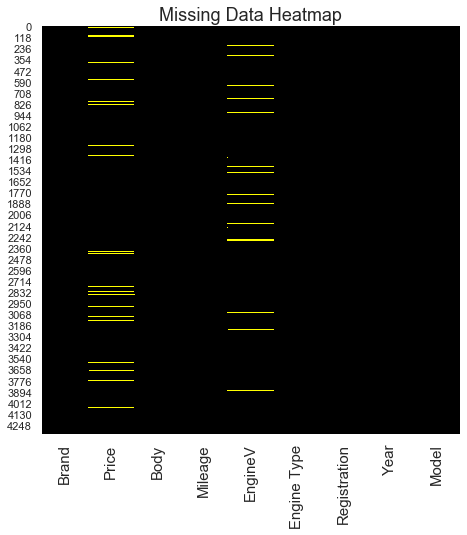

In [6]:
plt.figure(figsize = (7.5, 7.5))
plt.title('Missing Data Heatmap', fontsize = 18)
plt.xticks(fontsize = 15)
sns.heatmap(data.isnull(), cbar = False, cmap = 'gnuplot')
plt.show()

<br>Let's see __how many__ NULL values we have exactly. We have __172__ NULL values under the *Price* column, and __150__ NULL values under the *EngineV* column

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

<br> Let's remove all the rows that have a NULL value in them by running the following line of code.

In [8]:
data = data.dropna()

<br> Let's verify that all NULL values have been removed by counting the NULL values again. We see that now have __"0"__ NULL values in our entire data set.

In [9]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

<br>We can also see from the new heatmap that there are no more yellow lines in the heatmap; meaning that all NULL values have indeed been removed.

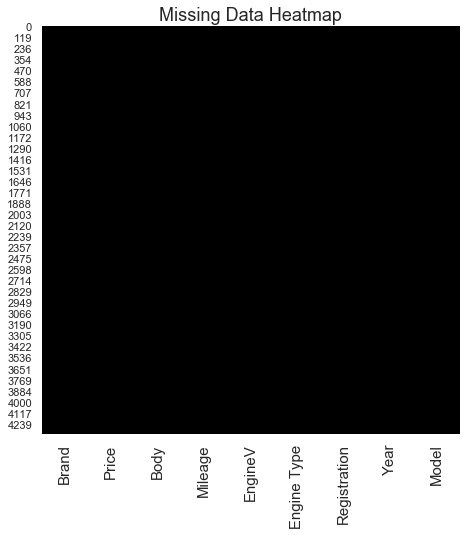

In [10]:
plt.figure(figsize = (7.5, 7.5))
plt.title('Missing Data Heatmap', fontsize = 18)
plt.xticks(fontsize = 15)
sns.heatmap(data.isnull(), cbar = False, cmap = 'gnuplot')
plt.show()

In [11]:
data_noNULL = data.copy()

### Generating the *rows_removed()* function

I know we will be removing more rows in our dataset once we get to working with outliers. A good rule-of-thumb I like to follow is to not remove more than 5% of the dataset. I wrote a very simple function that will help us keep tabs on how many rows we've removed so far.

In [12]:
def rows_removed(data):
    print('Current # of rows: {}'.format(data.shape[0]))
    print('Total rows removed: {}'.format(raw_data.shape[0] - data.shape[0]))
    print('Total rows removed (%): {}'.format(round(100*(raw_data.shape[0] - data.shape[0])/raw_data.shape[0],2)))

In [13]:
rows_removed(data_noNULL)

Current # of rows: 4025
Total rows removed: 320
Total rows removed (%): 7.36


<br>Even though we've already violated the 5% rule, 7.36% is still acceptable considering that we've only removed the NULL values so far. Leaving them in would only cause more problems for us down the road.

### Correcting Dubious EngineV Entries

As I was exploring this dataset, I noticed that there some questionable entries under the *EngineV* column. The following code displays the descriptive statistics of this column.

In [14]:
data_noNULL['EngineV'].describe()

count    4025.000000
mean        2.764586
std         4.935941
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

<br>We see that the maximum value in this column is __99.99__... No car in existence has an engine volume this big. A common way to label missing values is by assigning "*99.99*". These values will be treated as such and will be removed from the dataset. The following line of code removes all records with a "*99.99*" *EngineV*

In [15]:
data_fixEngineV = data_noNULL[data_noNULL.EngineV != 99.99]

<br>Another issue I realized is that some *EngineV* entries are higher than 10L. Commuter cars typically don't have engine volumes this big. As a comparison, monster trucks have engine volumes of up to [9.42L](https://en.wikipedia.org/wiki/Monster_truck). The following table is a subset of the dataset containing records with *EngineV* greater than or equal to 10L.

In [16]:
data_fixEngineV[data_fixEngineV.EngineV >= 10]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
538,Audi,1950.0,sedan,320,19.0,Other,no,1996,A4
630,Renault,4800.0,van,113,15.0,Diesel,yes,2006,Kangoo
1189,BMW,25000.0,crossover,150,30.0,Petrol,yes,2007,X5
1203,BMW,3300.0,sedan,233,28.0,Petrol,no,1997,528
1269,Renault,2750.0,hatch,186,22.0,Diesel,no,2005,Laguna
1431,Mercedes-Benz,6500.0,sedan,215,55.0,Petrol,no,2001,S 55
1818,Volkswagen,10800.0,sedan,63,20.0,Petrol,yes,2007,Passat B6
1905,Renault,7500.0,van,240,74.0,Diesel,yes,2005,Grand Scenic
2095,Renault,14999.0,van,54,66.0,Other,yes,2012,Kangoo
2169,Renault,6100.0,van,280,90.0,Diesel,yes,2008,Kangoo


<br>I realized that since this is a *real* dataset, it is reasonable to believe that these high engine volumes could be a result of __typing errors__. More precisely, I believe that people who entered these values may have misplaced the decimal point. In the table above, the engine volume of a 2007 *BMW X5* was recorded as __30.0L__. However, a quick search on Google suggests that the car actually has a __3.0L__ engine.

<br><table><tr><td><img src='http://ijeremiah.com/wp-content/uploads/2020/02/2007BMWx5.png'></td><td><img src='http://ijeremiah.com/wp-content/uploads/2020/02/1997BMW528.png'></td><td><img src='http://ijeremiah.com/wp-content/uploads/2020/02/2001MercS55.png'></td></tr></table>

The recorded engine volume is __10x__ the car's actual engine volume. This is true for *some* of the cars in the table; not all. The recorded engine volume for a 2001 *Mercedes-Benz S55* is __55.0L__, but the actual engine volume is __5.4L__.

These values will need to be corrected in some way before proceeding with the regression. I came up with three possible ways to do this:<br>
1. __Trim__ all records that contain an *EngineV* >= 10
2. __Cross-reference__ another dataset containing accurate engine volume information on all vehicles (Ex: https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip).
3. __Divide by 10__ all the entries that are >= 10.

I decided to go with the __3rd option__ for the following reasons:

1. Simply removing these unusual entries would bring us farther from the 5% rule. 
2. Cross-referencing requires additional processing of both datasets (to make sure that matches are made). 
3. Dividing all entries that are greater than 10 is relatively easy to implement and requires no additional removal of records. 

Even if the process of dividing these entries by 10 does not get us to the correct values, the results would at least be more realistic.

The following function checks each entry under the *EngineV* column and divides it by 10 if it is greater than or equal to 10.

In [17]:
def correct_mistyped_EngineV(x):
    if x > 10:
        return x/10
    else:
        return x

In [18]:
data_fixEngineV['EngineV'] = data_fixEngineV['EngineV'].apply(correct_mistyped_EngineV)

C:\Users\Jeremiah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


*Note: You may be seeing a __SettingWithCopyWarning__. This is only a warning; the entries are corrected as intended.*

<br>All *EngineV* entries have now been corrected. We no longer have "*99.99*" values, and all values are now under *10*.

In [19]:
data_fixEngineV['EngineV'].describe()

count    4018.000000
mean        2.475816
std         0.997204
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max         9.000000
Name: EngineV, dtype: float64

<br>Here's a quick check of how many records have been removed so far.

In [20]:
rows_removed(data_fixEngineV)

Current # of rows: 4018
Total rows removed: 327
Total rows removed (%): 7.53


 Only an additional 0.17% (7 more rows) have been removed.

### <br>OLS Assumption: No Multicollinearity

We first need to explore some of the OLS assumptions before proceeding with any regression. The first assumption we'll explore is the assumption of __No Multicollinearity__. Here I generated three scatter plots showing the relationships between the three numerical independent variables: __Mileage__, __EngineV__, and __Year__.

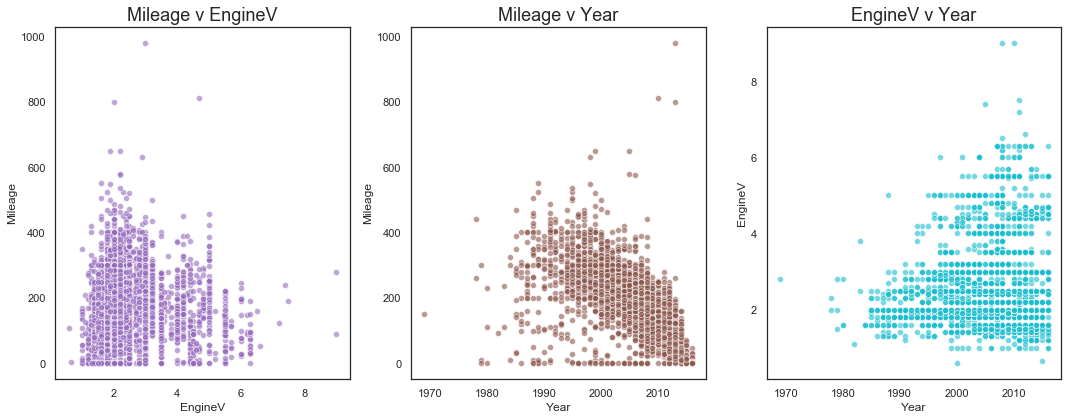

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15,6))
ax1.set_title('Mileage v EngineV', fontsize = 18)
sns.scatterplot(y = data_fixEngineV.Mileage, x = data_fixEngineV.EngineV, alpha = 0.6, color = 'tab:purple', ax = ax1)
ax2.set_title('Mileage v Year', fontsize = 18)
sns.scatterplot(y = data_fixEngineV.Mileage, x = data_fixEngineV.Year, alpha = 0.6, color = 'tab:brown', ax = ax2)
ax3.set_title('EngineV v Year', fontsize = 18)
sns.scatterplot(y = data_fixEngineV.EngineV, x = data_fixEngineV.Year, alpha = 0.6, color = 'tab:cyan', ax = ax3)
plt.show()

<br>Another way of exploring the relationship between the independent variables is to create what's called a __correlation heatmap__. A correlation heatmap, like the one below, describes the same relationship apparent in the three scatterplots above.

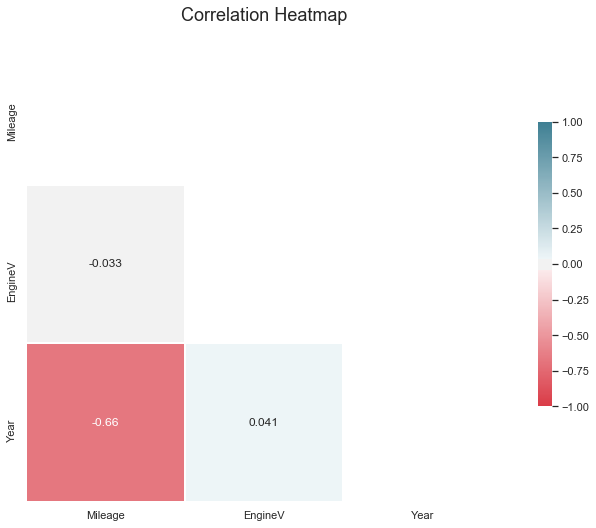

In [22]:
plt.figure(figsize = (10.5,7.5), tight_layout = True)
plt.title('Correlation Heatmap', fontsize = 18)
corr = data_fixEngineV[['Mileage','EngineV','Year']].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, 
            cmap = cmap, 
            mask = mask, 
            center = 0, 
            vmax = 1, 
            vmin = -1, 
            square = True, 
            linewidths = 0.5, 
            cbar_kws={"shrink": 0.6},
            annot = True,
)
plt.show()

*Note: Depending on your version of matplotlib, the correlation heatmap above may appear cutoff on the top and bottom. [This is a known issue in 3.1.1](https://github.com/mwaskom/seaborn/issues/1773). Upgrade to version 3.1.2 or higher to see the visualization as intended*

<br>Looking at the heatmap and the scatterplots, it appears that there is some negative correlation between *Year* and *Mileage*. To verify this, I calculated the __Variance Inflation Factors (VIF)__. The VIF quantifies the effect of multicollinearity on the variances of the regression coefficients. The higher the VIF for a particular variable, the more likely that this variable is correlated with the other variables.

A rule-of-thumb commonly followed in practice is that if the __VIF > 5__, then that predictor is significantly correlated with the other variables. Removing it from the regression should be seriously considered. There are cases where a high VIF [can be safely ignored](https://statisticalhorizons.com/multicollinearity), but those cases don't apply in our situation.

In [23]:
variables = data_fixEngineV[['Mileage', 'EngineV', 'Year']]
vif_df = pd.DataFrame(variables.columns.values, columns = ['Feature'])
vif_df['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_df

,Feature,VIF
0,Mileage,3.478103
1,EngineV,7.175415
2,Year,9.866557


#### <br>Dropping Year

The VIF values for *EngineV* and *Year* supports the idea that these predictors may be correlated. One of these two needs to be dropped from our dataset. I decided to drop *Year* simply because it has a higher VIF value than *EngineV*.

In [24]:
data_noYear = data_fixEngineV.drop('Year', axis = 1)

### OLS Assumption: Linearity

The next OLS assumption we'll explore is the assumption of __Linearity__. I generated these three scatterplots to visualize the relationship of the dependent variable, *Price*, with each of the numerical independent variable, *Mileage* and *Year*.

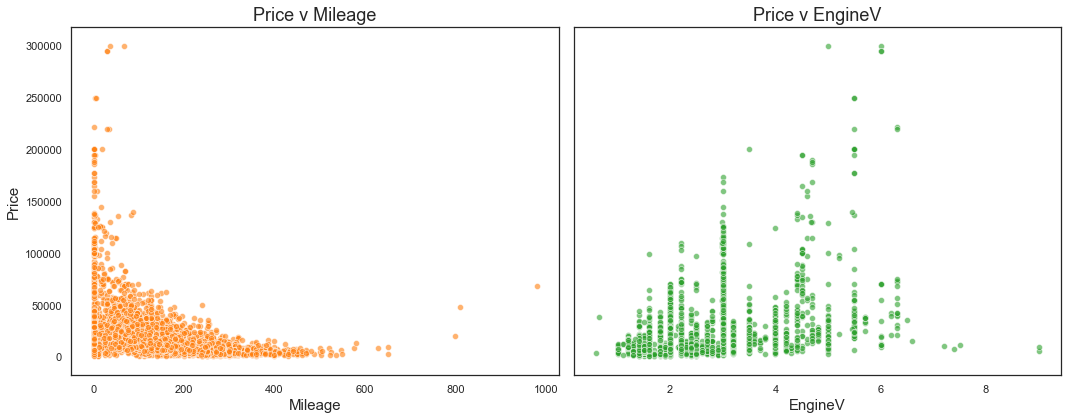

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, tight_layout = True, figsize = (15, 6), sharey = True)
ax1.set_title('Price v Mileage', fontsize = 18)
ax1.set_ylabel('Price', fontsize = 15)
sns.scatterplot(x = data_noYear.Mileage, y = data_noYear.Price, color = 'tab:orange', ax= ax1, alpha = 0.6)
ax1.set_xlabel('Mileage', fontsize = 15)
ax2.set_title('Price v EngineV', fontsize = 18)
sns.scatterplot(x = data_noYear.EngineV, y = data_noYear.Price, color = 'tab:green', ax = ax2, alpha = 0.6)
ax2.set_xlabel('EngineV', fontsize = 15)
plt.show()

#### Transforming Price

We can spot patterns in these scatterplots but definitely not linear ones. We cannot run a regression in this case. In order to proceed with the regression, we first need to transform one or more variables. Here I did a __log-transformation__ on *Price* and re-created the same scatterplots with *logPrice* on the y-axis instead of *Price*.

In [26]:
data_noYear['logPrice'] = np.log(data_noYear.Price)
data_noYear.drop('Price', axis = 1, inplace = True)

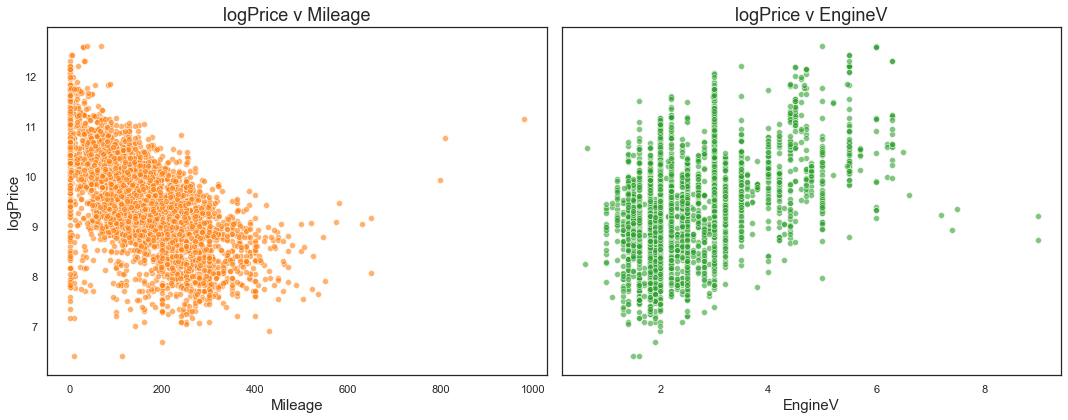

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, tight_layout = True, figsize = (15, 6), sharey = True)
sns.scatterplot(x = data_noYear.Mileage, y = data_noYear.logPrice, color = 'tab:orange', ax= ax1, alpha = 0.6)
ax1.set_title('logPrice v Mileage', fontsize = 18)
ax1.set_ylabel('logPrice', fontsize = 15)
ax1.set_xlabel('Mileage', fontsize = 15)
sns.scatterplot(x = data_noYear.EngineV, y = data_noYear.logPrice, color = 'tab:green', ax = ax2, alpha = 0.6)
ax2.set_title('logPrice v EngineV', fontsize = 18)
ax2.set_xlabel('EngineV', fontsize = 15)
plt.show()

#### Transforming EngineV

The relationships definitely look more linear than before. Let's transform *EngineV* as well to *compress* the relationship slightly.

In [28]:
data_noYear['logEngineV'] = np.log(data_noYear.EngineV)
data_noYear.drop('EngineV', axis = 1, inplace = True)

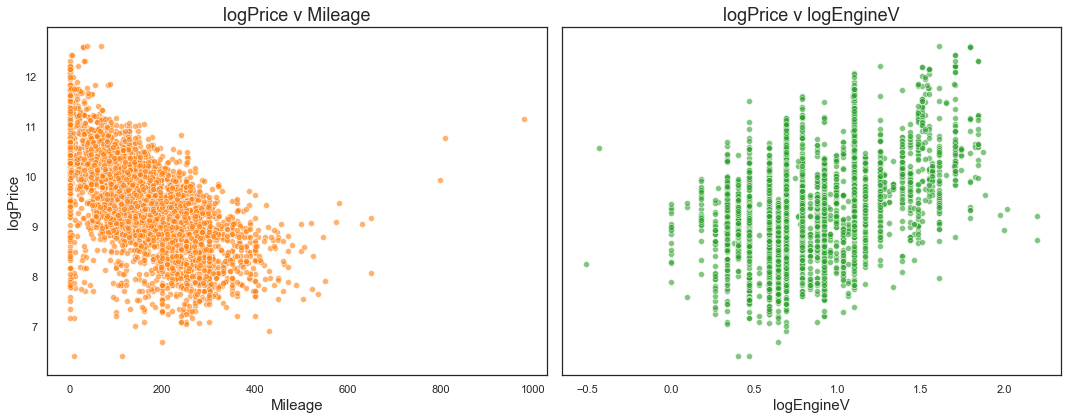

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, tight_layout = True, figsize = (15, 6), sharey = True)
sns.scatterplot(x = data_noYear.Mileage, y = data_noYear.logPrice, color = 'tab:orange', ax= ax1, alpha = 0.6)
ax1.set_title('logPrice v Mileage', fontsize = 18)
ax1.set_ylabel('logPrice', fontsize = 15)
ax1.set_xlabel('Mileage', fontsize = 15)
sns.scatterplot(x = data_noYear.logEngineV, y = data_noYear.logPrice, color = 'tab:green', ax = ax2, alpha = 0.6)
ax2.set_title('logPrice v logEngineV', fontsize = 18)
ax2.set_xlabel('logEngineV', fontsize = 15)
plt.show()

#### Transforming Mileage

I think it will be a great idea to log-transform *Mileage* as well. However, this wouldn't be possible because there are "*0*" values (corresponding to less than 1,000 miles). We'll leave *Mileage* as-is and proceed to exploring the other OLS assumptions.

In [30]:
data_transformed = data_noYear.copy()

### <br>The Other OLS Assumptions

Let's discuss the remaining OLS assumptions:

- __No Endogeneity__ - Admittedly, I don't have the domain knowledge required to say whether ommitted variable bias exists or not. For now, I'll assume that this assumption holds.
- __No Autocorrelation__ - This will not be an issue since we are not dealing with time-series or panel data.
- __Zero Mean of the Error Term__ - This won't be a concern since we'll be including the constant constant term in our regression.
- __Homoscedasticity of the Error Term__ - This assumption will be explored later on once we generate the residuals plots.
- __Normality of the Error Term__ - Not an issue since we have a relatively large dataset. Normality is assumed for a big sample (>= 30 observations) following the Central Limit Theorem.

### <br>Dealing with Outliers

I generated the three box-and-whiskers plots below to help us visualize the state of our outliers. [Seaborn determines outliers based on the interquartile range (IQR)](https://seaborn.pydata.org/generated/seaborn.boxplot.html). By default, Seaborn classifies any point above or below 1.5**IQR* as outliers. 

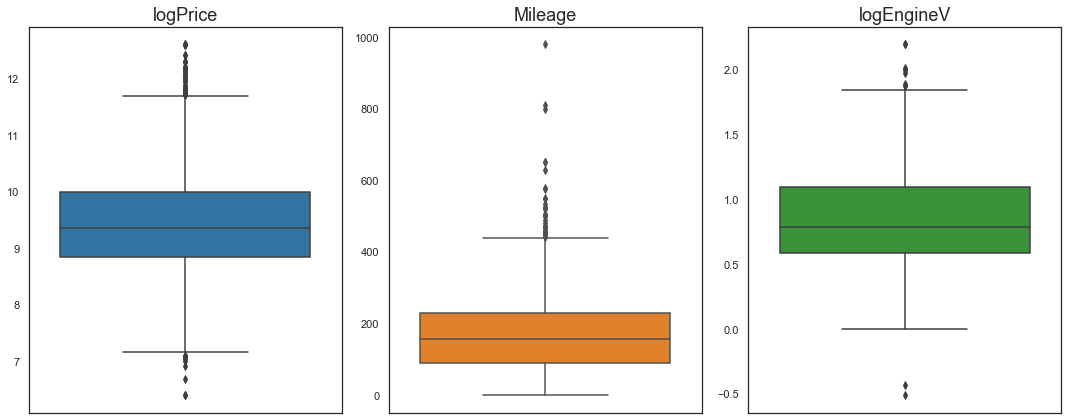

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = data_transformed.logPrice, ax = ax1, color = 'tab:blue')
ax1.set_title('logPrice', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = data_transformed.Mileage, ax = ax2, color = 'tab:orange')
ax2.set_title('Mileage', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = data_transformed.logEngineV, ax = ax3, color = 'tab:green')
ax3.set_title('logEngineV', fontsize = 18)
ax3.set_ylabel(None)
plt.show()

#### Counting the Outliers

The box plots above help us visualize the range of the outliers. What these plots don't tell us is how many outliers there are. The following lines of code counts the total number of outliers in each of the three variables.  

In [32]:
df = data_transformed[['logPrice','Mileage','logEngineV']]
q3, q1 = df.quantile(0.75), df.quantile(0.25), 
iqr = q3-q1
maxm, minm = q3 + 1.5*iqr, q1 - 1.5*iqr 

print(((df < minm) | (df > (maxm))).sum())

logPrice      63
Mileage       36
logEngineV     9
dtype: int64


There are __63__ outliers in *logPrice*, __36__ in *Mileage*, and __9__ in *logEngineV*

#### Removing the Outliers

The following line of code removes these outliers from the dataset. It uses the same __minm__ and __maxm__ variables from before, with *minm* = *q1 - 1.5 * iqr* and *maxm* = *q3 + 1.5 * iqr* 

In [33]:
data_noOL = data_transformed[~((data_transformed < minm) | (data_transformed > maxm)).any(axis=1)]

<br>To verify that all outliers have been removed, let's re-count the outliers.

In [34]:
df = data_noOL[['logPrice','Mileage','logEngineV']]
print(((df < minm) | (df > (maxm))).sum())

logPrice      0
Mileage       0
logEngineV    0
dtype: int64


<br>All outliers are gone as expected! Let's generate the new boxplots to see the difference.

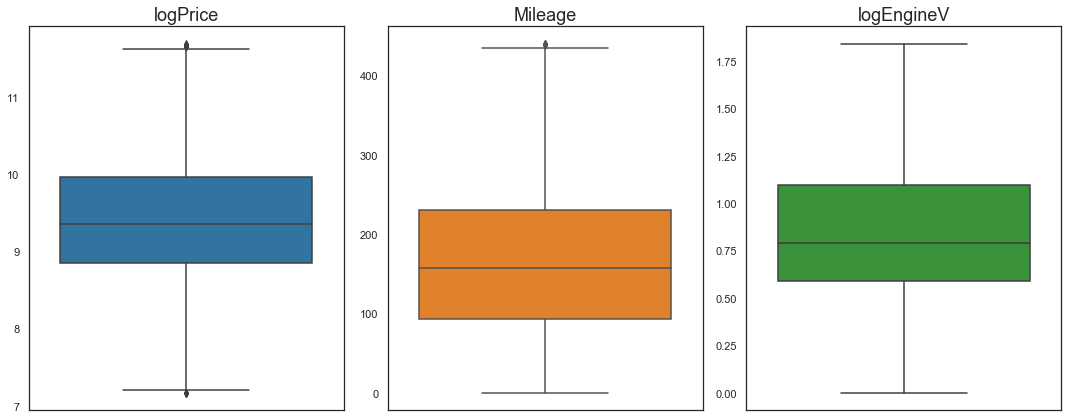

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = data_noOL.logPrice, ax = ax1, color = 'tab:blue')
ax1.set_title('logPrice', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = data_noOL.Mileage, ax = ax2, color = 'tab:orange')
ax2.set_title('Mileage', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = data_noOL.logEngineV, ax = ax3, color = 'tab:green')
ax3.set_title('logEngineV', fontsize = 18)
ax3.set_ylabel(None)
plt.show()

*Note: The outliers displayed in these new boxplots are the outliers __relative__ to the new __data_noOL__ data variable. All outliers from __data_transformed__ have been removed.*

<br>To wrap-up this section, let's see how many rows we have removed so far.

In [36]:
rows_removed(data_noOL)

Current # of rows: 3910
Total rows removed: 435
Total rows removed (%): 10.01


Yikes... That is a 2.48% increase (108 rows removed) from before! It is certainly worth exploring other ways to deal with outliers that require little no additional removal of data. For now, however, we'll put this task aside and proceed with feature scaling.

### <br>Feature Scaling

Let's take a look at our numerical features and take note of the difference in magnitudes.

In [37]:
data_unscaled = data_noOL.copy()
data_unscaled[['Mileage','logEngineV']].describe()

,Mileage,logEngineV
count,3910.000000,3910.000000
mean,161.905882,0.830551
std,96.137654,0.343984
min,0.000000,0.000000
25%,93.000000,0.587787
50%,158.000000,0.788457
75%,230.000000,1.098612
max,440.000000,1.840550


<br>Most of the *Mileage* values are __in the hundreds__, while the *logEngineV* values are __between 0 and 1.841__. In order for our regression to treat these two features equally, we need to transform our data into a standard scale. Here I used the __StandardScaler__ module from *sklearn* to do the standardization.

In [38]:
scaler = StandardScaler()
x = data_unscaled[['Mileage','logEngineV']]
scaler.fit(x)
x_scaled = scaler.transform(x)

data_scaled = data_unscaled.copy()
data_scaled[['Mileage','logEngineV']] = x_scaled

<br>Both *Mileage* and *logEngineV* have now been transformed into a standard scale. Let's see how these two features look now.

In [39]:
pd.set_option('display.float_format', '{:.3f}'.format)
data_scaled[['Mileage','logEngineV']].describe()

,Mileage,logEngineV
count,3910.000,3910.000
mean,-0.000,0.000
std,1.000,1.000
min,-1.684,-2.415
25%,-0.717,-0.706
50%,-0.041,-0.122
75%,0.708,0.779
max,2.893,2.937


<br>Great! Both features are now similar in magnitude. We are now done pre-processing our __numerical data__. The next step is to explore our __categorical data__. Specifically, we now have to convert our categorical data into numerical data for them to be included in the regression. We do this by creating dummy variables.

### <br>Generating Dummy Variables

#### Dropping *Model*

Let's take a look at all our categorical data: *Brand, Body, Engine Type, Registration, and Model*.

In [40]:
data_scaled.describe(exclude = [np.number])

,Brand,Body,Engine Type,Registration,Model
count,3910,3910,3910,3910,3910
unique,7,6,4,2,293
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,862,1494,1813,3547,185


<br>We see that there are __293 unique__ entries under *Model*. We'll drop this column from our dataset as we'll see later on how this big of a number can be a problem. 

In [41]:
data_scaled = data_scaled.drop('Model', axis = 1)

#### Creating the Dummy Variables with *get_dummies*

*Pandas* has a great method called __get_dummies()__ that spots all the categorical variables in a data frame and automatically creates dummy variables for each of them. An important note to know is that if we have __N__ number of categories for a feature, we need to create __N - 1 dummies__ to avoid re-introducing multicollinearity to our regression. The *drop_first = True* argument takes care of this for us.

In [42]:
data_dummies = pd.get_dummies(data_scaled, drop_first = True)

In [43]:
data_dummies.head()

,Mileage,logPrice,logEngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.197,8.343,-0.400,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2.758,8.975,0.681,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2.040,9.496,2.265,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.812,10.043,1.758,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,-0.436,9.815,-0.400,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


<br>The dummy variables have now been created! Our dataset has become *wider* as a result. If we had kept *Model*, this dataset will be 292 columns wider! Another thing to note is that if we allowed both *Brand* and *Model* to exist in our dataset, multicollinearity will be re-introduced as there is surely a relationship between car's make and its model (ex. a *Passat* is obviously going to be a *Volkswagen*).

The following code allows us to see which categories were dropped by the *drop_first = True* argument from each feature. These categories are also called the __reference categories__. For example, if all *Brand_* columns are *0*, then the car is an Audi. If all *Body_* columns are *0*, then the car has a crossover body type.

In [44]:
reference_categories = pd.DataFrame({'Variable':['Brand','Body','Engine Type','Registration']})
reference_categories['Reference Category'] = [np.sort(data_noOL[i].unique())[0] for i in reference_categories['Variable'].values]
reference_categories

,Variable,Reference Category
0,Brand,Audi
1,Body,crossover
2,Engine Type,Diesel
3,Registration,no


### <br>Our Pre-Processed Data

We are now done with pre-processing our data! We can now proceed with building our regression. Let's take a look at the final state of our dataset.

In [45]:
processed_data = data_dummies.copy()
processed_data.head(15)

,Mileage,logPrice,logEngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.197,8.343,-0.400,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2.758,8.975,0.681,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2.040,9.496,2.265,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.812,10.043,1.758,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,-0.436,9.815,-0.400,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
6,2.872,8.716,-0.400,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
7,0.396,9.561,0.473,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,0.323,9.287,-1.236,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,0.521,7.244,-0.706,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
10,0.157,9.388,-1.236,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


#### Multicollinearity Check

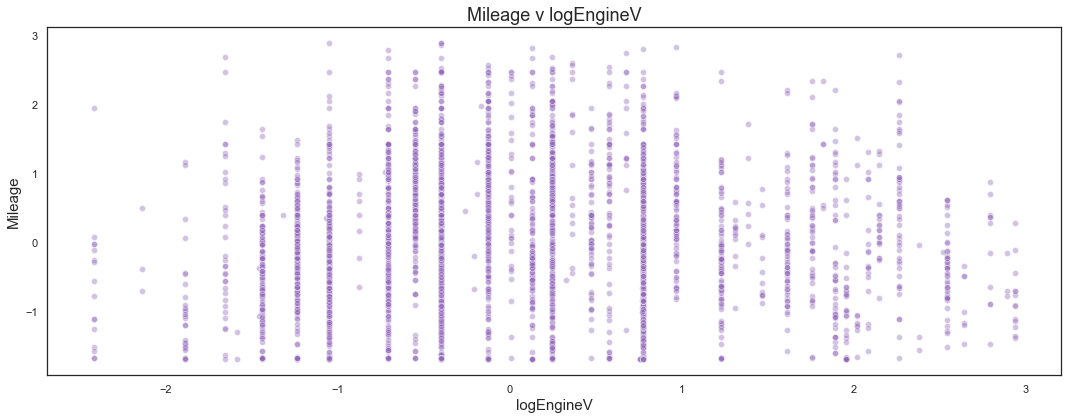

In [46]:
plt.figure(figsize = (15, 6), tight_layout = True)
plt.title('Mileage v logEngineV', fontsize = 18)
plt.xlabel('logEngineV', fontsize = 15)
plt.ylabel('Mileage', fontsize = 15)
sns.scatterplot(x = processed_data.logEngineV, y = processed_data.Mileage, color = 'tab:purple', alpha = 0.4)
plt.show()

#### Linearity Check

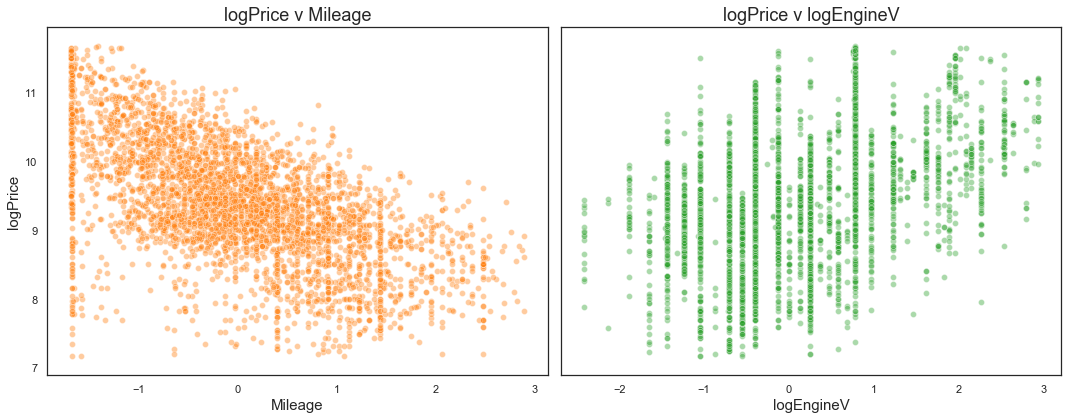

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, tight_layout = True, figsize = (15,6), sharey = True)
sns.scatterplot(x = processed_data.Mileage, y = processed_data.logPrice, color = 'tab:orange', alpha = 0.4, ax = ax1)
ax1.set_title('logPrice v Mileage', fontsize = 18)
ax1.set_ylabel('logPrice', fontsize = 15)
ax1.set_xlabel('Mileage', fontsize = 15)
sns.scatterplot(x = processed_data.logEngineV, y = processed_data.logPrice, color = 'tab:green', alpha = 0.4, ax = ax2)
ax2.set_title('logPrice v logEngineV', fontsize = 18)
ax2.set_xlabel('logEngineV', fontsize = 15)
plt.show()

#### Distribution of Numerical Data

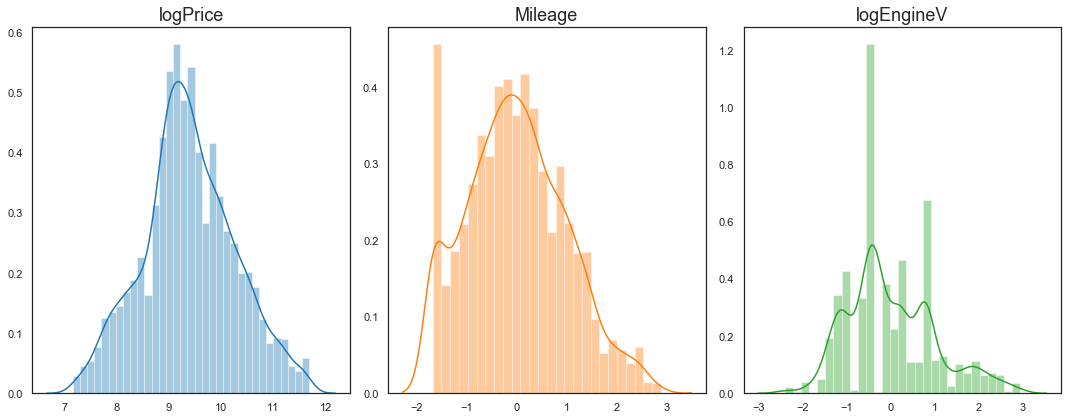

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.distplot(processed_data.logPrice, ax = ax1, color = 'tab:blue')
ax1.set_title('logPrice', fontsize = 18)
ax1.set_xlabel(None)
sns.distplot(processed_data.Mileage, ax = ax2, color = 'tab:orange')
ax2.set_title('Mileage', fontsize = 18)
ax2.set_xlabel(None)
sns.distplot(processed_data.logEngineV, ax = ax3, color = 'tab:green')
ax3.set_title('logEngineV', fontsize = 18)
ax3.set_xlabel(None)
plt.show()

#### State of outliers

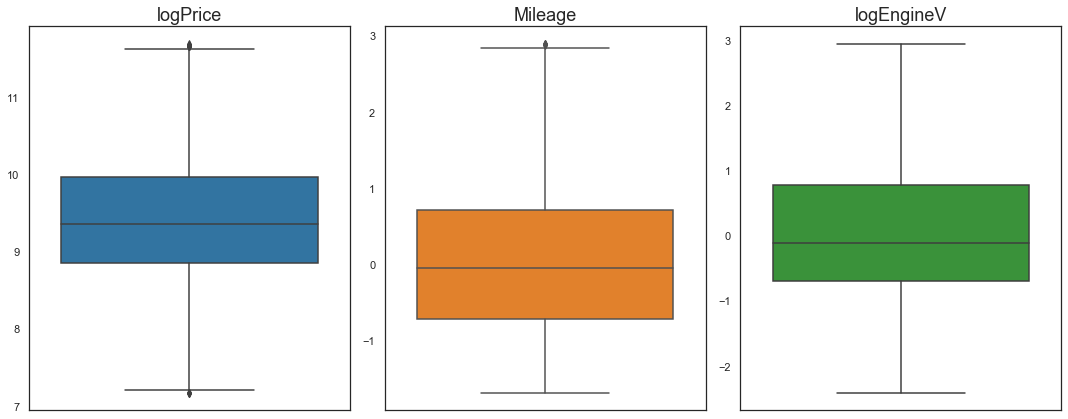

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = processed_data.logPrice, ax = ax1, color = 'tab:blue')
ax1.set_title('logPrice', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = processed_data.Mileage, ax = ax2, color = 'tab:orange')
ax2.set_title('Mileage', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = processed_data.logEngineV, ax = ax3, color = 'tab:green')
ax3.set_title('logEngineV', fontsize = 18)
ax3.set_ylabel(None)
plt.show()

#### Total Rows Removed

In [50]:
rows_removed(processed_data)

Current # of rows: 3910
Total rows removed: 435
Total rows removed (%): 10.01


### <br>Declaring the Target and the Predictors

The first thing we'll need to do is to declare which variable are we trying to predict (the target), and which variables are we using to make the predictions (the predictors). The target in our case is *__logPrice__*; everything else will be the predictors.

In [51]:
y = processed_data['logPrice']
x = processed_data.drop('logPrice', axis =1)

### <br>Train-Test Split

Since we were only given one dataset to work with, we'll be splitting this dataset into a training set and a testing set. 80% of the data will be used for training/building the model while the other 20% will be used for testing the model. Here I used *sklearn*'s __train_test_split__ module to split the data randomly. 

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### <br>Building the Model

Two commonly used libraries for building regressions are __statsmodels__ and __sklearn__. For demonstration, I will be using both libraries to generate the same regression model.

#### Using *statsmodels*

In [53]:
x_train_df = pd.DataFrame(x_train, columns = x.columns.values)
X_train = sm.add_constant(x_train_df)
sm_model = sm.OLS(y_train,X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     503.9
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:54:30   Log-Likelihood:                -1971.2
No. Observations:                3128   AIC:                             3978.
Df Residuals:                    3110   BIC:                             4087.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.0241    

<br>One advantage *statsmodels* has over *sklearn* is that it produces this neat table that summarizes the result of the regression. Let's make sense of this table by interpreting some of the numbers we see.

__R-squared__ (0.734) and __Adj. R-squared__ (0.732):
<br>Since we're doing a multiple linear regression, it makes much more sense to look at the Adjusted R-squared instead of the R-squared. An Adj. R-squared value of 0.732 means that around 73% of the variance in *logPrice* is explained by our model. It is definitely not a bad number, but it certainly could be better.

__F-statistic__ (503.9) & __Prob (F-statistic)__ (0.00):
<br>These numbers tell us the overall significance of our model. The higher the F-statistic is, the better. The lower the Prob (F-statistic) is, the better. The null hypothesis being tested here is that __all coefficients are equal to zero__. Our numbers tell us that our model is significant at all significance levels.

__coef__:
<br>These are the coefficients of our model. A brief interpretation of these coefficients is that if all other variables are held constant, a 1 unit increase in *Mileage* corresponds to a 0.4571% decreases in a car's *Price*. 



#### Using *sklearn*

In [54]:
model = LinearRegression().fit(x_train, y_train)

Some of the numbers we see in the *statsmodels* table above are difficult to re-create in *sklearn*. It does have a method for calculating the R-squared but it doesn't have a straightforward way of calculating the Adjusted R-squared. *sklearn* also does not have a direct method to calculate the F-statistic.

We'll use *sklearn*'s __score()__ method to calculate the R-squared, and then use that R-squared value to manually calculate the Adjusted R-squared. We'll also use the __coef___ method to gather all the coefficients, and the __intercept___ method to determine the constant term. 

In [55]:
R2 = round(model.score(x_train, y_train), 3)
R2_adj = round(1 - (1-R2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1),3)
intercept = model.intercept_.round(4)
coeff = model.coef_.round(4)

In [56]:
R = pd.DataFrame({'Metric':['R-squared','Adj. R-squared'], 'Score': [R2, R2_adj]})
R

,Metric,Score
0,R-squared,0.734
1,Adj. R-squared,0.733


In [57]:
weights = pd.DataFrame({'Parameter': np.append('const', x.columns.values), 'Coef': np.append(intercept, coeff)})
weights

,Parameter,Coef
0,const,9.024
1,Mileage,-0.457
2,logEngineV,0.230
3,Brand_BMW,0.076
4,Brand_Mercedes-Benz,0.046
5,Brand_Mitsubishi,-0.453
6,Brand_Renault,-0.479
7,Brand_Toyota,-0.121
8,Brand_Volkswagen,-0.172
9,Body_hatch,-0.556


<br>Great! We can see that all numbers are identical to the OLS results using *statsmodels*. We now have our linear regression model. We will now evaluate this using a number of visualizations.

#### Evaluating the Model (Training Data)

Here we are using our model to make some predictions using the same data set we trained our model on.

In [58]:
y_hat_train = model.predict(x_train)

<br>I prepared a data frame comparing the predicted values and observed values. __Residual__ is calculated as *Predicted - Observed*. __Abs. Error__ is simply the absolute value of the Residual.

In [59]:
eval_df_train = pd.DataFrame({'Predicted': y_hat_train, 
                              'Observed': y_train, 
                              'Residual': y_hat_train - y_train,
                              'Abs. Error': np.abs(y_hat_train - y_train)
                             }
)

In [60]:
eval_df_train.head(8)

,Predicted,Observed,Residual,Abs. Error
277,8.714,8.666,0.049,0.049
3301,9.045,9.205,-0.160,0.160
3311,9.922,9.952,-0.030,0.030
2977,10.064,10.309,-0.245,0.245
3090,9.961,10.215,-0.254,0.254
1213,10.034,9.793,0.241,0.241
2081,8.956,8.882,0.074,0.074
720,9.617,10.123,-0.506,0.506


<br>Let's take a look at the descriptives. We can see the __mean Residual__ is __0.000__ (1.02e-15). That's great! This means that on average, the difference between our predicted values and the observed values is roughly zero. The __Mean Absolute Error__ (MAE) is only __0.324__.

In [61]:
pd.set_option('display.float_format', '{:.3f}'.format)
eval_df_train.describe()

,Predicted,Observed,Residual,Abs. Error
count,3128.000,3128.000,3128.000,3128.000
mean,9.395,9.395,0.000,0.324
std,0.754,0.881,0.454,0.319
min,6.968,7.170,-1.616,0.000
25%,8.921,8.854,-0.271,0.111
50%,9.366,9.350,-0.030,0.242
75%,9.903,9.976,0.211,0.432
max,11.189,11.687,2.895,2.895


In [62]:
eval_df_train['Residual'].mean()

1.0165213371248236e-15

<br>In addition to the R-squared, the Adjusted R-squared values, and the Mean Absolute Error,  I will also include the __Root Mean Squared Error__ (RMSE) to help us evaluate our model. We'd want both the MAE and the RMSE to be as low as possible. So far, our numbers our telling us that we have a relatively good model

In [63]:
MAE = mean_absolute_error(y_train, y_hat_train)
RMSE = np.sqrt(mean_squared_error(y_train, y_hat_train))

In [64]:
metrics_train = pd.DataFrame({'Metric': ['R-squared', 'Adj. R-squared', 'MAE', 'RMSE'], 
                        'Score': [R2, R2_adj, MAE, RMSE]})
metrics_train

,Metric,Score
0,R-squared,0.734
1,Adj. R-squared,0.733
2,MAE,0.324
3,RMSE,0.454


<br>Let's generate some visualizations to help us understand our model even more. The following is a scatter plot of the predicted values on the y-axis and the observed values on the x-axis. Ideally, we would want the points to form along a 45-degree line. 

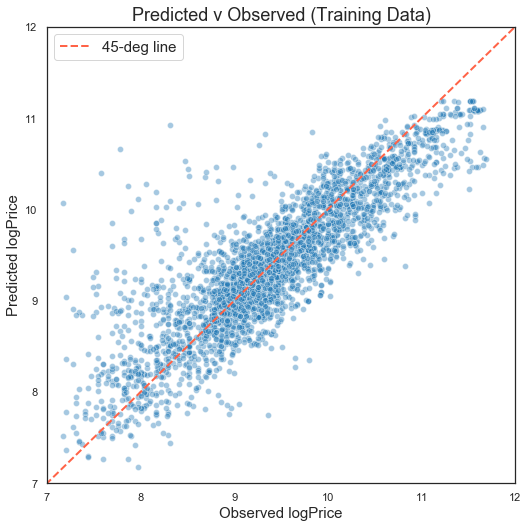

In [65]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_train, y = y_hat_train, alpha = 0.4, color = 'tab:blue')
plt.xlabel('Observed logPrice', fontsize = 15)
plt.ylabel('Predicted logPrice', fontsize = 15)
plt.xlim(7,12)
plt.ylim(7,12)
plt.title('Predicted v Observed (Training Data)', fontsize = 18)
plt.plot([0, 12], [0, 12], color = 'tomato', ls = '--', lw = 2, label = '45-deg line')
plt.legend(fontsize = 15)
plt.show()

Looking at this plot, we can make the following observations:
1. __Most points do__ form along this 45-degree line.
2. The points tend to be __more scattered in the lower price range__ (*Observed logPrice* < 9).
3. Some of the __over-predictions in the lower price range are quite large__.
4. The model __almost always under-predict in the higher price range__ (*Observed logPrice* > 11).
5. The model tend to __perform really well in the middle price range__ (9 < *Observed logPrice* < 11).
6. We don't have a lot of data in the lower and higher prices ranges.
7. Our model tend to __underpredict overall__.

The following is a scatterplot of the *Absolute Error* vs the *Observed logPrice*. The plot supports some of the observations we made.

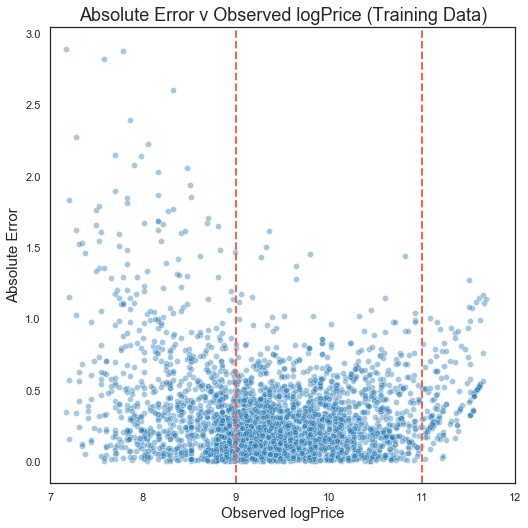

In [66]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_train, y = eval_df_train['Abs. Error'], alpha = 0.4, color = 'tab:blue')
plt.axvline(x = 11, ls = '--', lw = 2, color = 'tomato', label = '11')
plt.axvline(x = 9, ls = '--', lw = 2, color = 'tomato', label = '9')
plt.title('Absolute Error v Observed logPrice (Training Data)', fontsize = 18)
plt.xlabel('Observed logPrice', fontsize = 15)
plt.ylabel('Absolute Error', fontsize = 15)
plt.xlim(7,12)
plt.show()

<br>It appears that we can essentially split our data into three bins: cars that have a __*logPrice* less than 9__, cars that have a __*logPrice* between 9 and 11__, and cars that have a __*logPrice* greater than 11__. Let's examine these bins by looking at some of the descriptive statistics.

In [67]:
bins_train = pd.DataFrame({'Observed_logPrice': y_train, 
                        'Residual': eval_df_train.Residual, 
                        'Abs. Error': eval_df_train['Abs. Error']})

In [68]:
bins_train_desc = bins_train.groupby(pd.cut(bins_train.Observed_logPrice, [7,9,11,12])).agg(count = ('Residual', 'count'), 
                                                                                            mean_Residual = ('Residual', np.mean), 
                                                                                            max_Residual = ('Residual', 'max'),
                                                                                            mean_AbsError = ('Abs. Error', np.mean), 
                                                                                            max_AbsError = ('Abs. Error', 'max'))
bins_train_desc

,count,mean_Residual,max_Residual,mean_AbsError,max_AbsError
Observed_logPrice,,,,,
"(7, 9]",988,0.266,2.895,0.422,2.895
"(9, 11]",1996,-0.097,1.506,0.264,1.616
"(11, 12]",144,-0.484,-0.018,0.484,1.275


<br>The resulting table supports the observations we made earlier. Most of the cars in our data are in fact in the middle price range. The mean Residual in the lower price range is a positive number; meaning that our model tend to over-predict in this range. Our model tend to under-predict in the middle and higher price ranges based on the negative signs of the mean_Residual. All predictions in the higher price range are under-predictions based on the sign of the max_Residual. Our model tend to do really well in the middle price range based on the value of the mean_AbsError. Finally, our largest mis-prediction happened in the lower price range based on the value of the max_AbsError.

<br>The following is a distribution plot of the the Residuals. We can see that the Residuals are centered around zero. This confirms our finding about the mean Residual value earlier. However, we can also notice that the plot is __right-skewed__. This verifies observations #3 and #6.

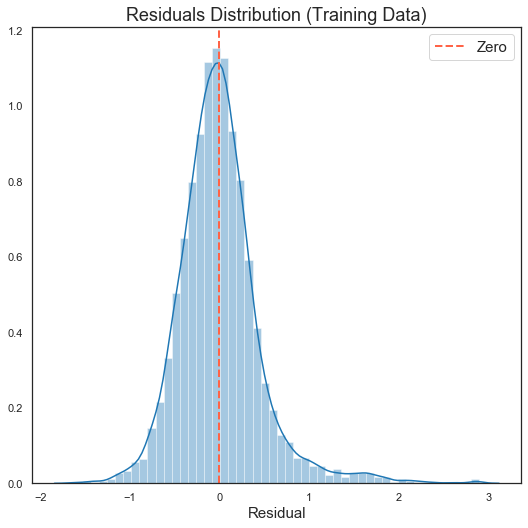

In [69]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
plt.title('Residuals Distribution (Training Data)', fontsize = 18)
plt.xlabel('Residual', fontsize = 15)
sns.distplot(eval_df_train.Residual, color = 'tab:blue')
plt.axvline(x = 0, ls = '--', lw = 2, color = 'tomato', label = 'Zero')
plt.legend(fontsize = 15)
plt.show()

<br>The following plot is a traditional Residuals plot. The Residuals are plotted on the y-axis while the Predicted values are plotted on the x-axis. Ideally, we would want the points to form a rectangular shape. It is clear, however, that our points form more of a *cone* instead. This indicates a __heteroscadisticity of the error term__. It looks like a linear regression model isn't ideal after all! Well, since we've already gone this far, let's proceed anyway. Perhaps we can do something later on that would that would allow us to avoid violating this OLS assumption.

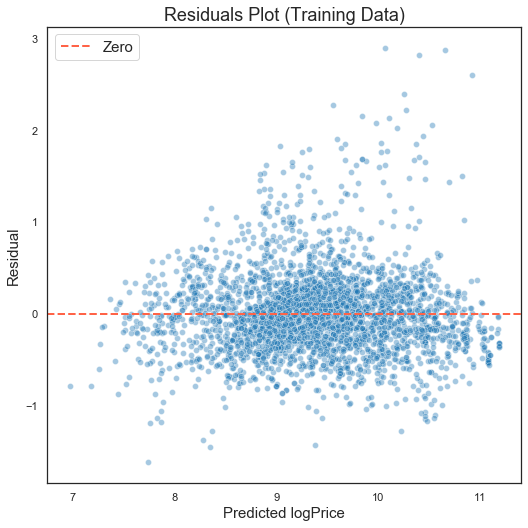

In [70]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
plt.title('Residuals Plot (Training Data)', fontsize = 18)
plt.xlabel('Predicted logPrice', fontsize = 15)
plt.ylabel('Residual', fontsize = 15)
sns.scatterplot(x = y_hat_train, y = eval_df_train.Residual, alpha = 0.4, color = 'tab:blue')
plt.axhline(y = 0, ls = '--', lw = 2, color = 'tomato', label = 'Zero')
plt.legend(fontsize = 15, loc = 'upper left')
plt.show()

### <br>Testing the Model

Now that we have thoroughly described our model, it is time to use it on the testing data! Let's see if the observations we made still hold. First we'll use our model to make predictions on the test data. We will then generate the same tables and scatterplots from before and compare the results.

#### Making Predictions

In [71]:
y_hat = model.predict(x_test)

#### Evaluating the Results

The descriptives are very similar to the descriptives from the training data. The main difference I can see is the value of the mean_Residual. Earlier, we had a mean_Residual of 0.000. With the testing data, we found our mean Residual to be __0.013__. This quite a large number relative to the previous value, but still a small number overall.

In [72]:
eval_df = pd.DataFrame({'Predicted': y_hat, 
                        'Observed': y_test, 
                        'Residual': y_hat - y_test, 
                        'Abs. Error': np.abs(y_hat - y_test)})

In [73]:
eval_df.describe()

,Predicted,Observed,Residual,Abs. Error
count,782.000,782.000,782.000,782.000
mean,9.395,9.382,0.013,0.318
std,0.743,0.869,0.456,0.327
min,6.983,7.168,-1.165,0.000
25%,8.942,8.854,-0.241,0.101
50%,9.422,9.350,-0.012,0.228
75%,9.880,9.951,0.209,0.429
max,11.188,11.653,2.635,2.635


<br>Let's now compare R-squared, Adjusted R-squared, MAE, and RMSE. We see that the numbers are all very similar. In general, since the model is working on unfamiliar data, we expect the R values to be smaller than before and the Error values to be larger. That seems to be the case here with the exception of the MAE value. The MAE with test data is 0.006 smaller than before. This difference, however, is still very trivial and so we won't dwell too much on it.

In [74]:
R2 = model.score(x_test, y_test)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = np.sqrt(mean_squared_error(y_test, y_hat))

metrics = pd.DataFrame({'Metric': ['R-squared', 'Adj. R-squared', 'MAE', 'RMSE'], 
                        'Score': [R2, R2_adj, MAE, RMSE]})
metrics

,Metric,Score
0,R-squared,0.725
1,Adj. R-squared,0.719
2,MAE,0.318
3,RMSE,0.456


<br>The "45-degree" plot is similar to the one we got earlier. We can see the same oberservations as before. The "Absolute Error v Observed logPrice" plot is very similar to the one before as well.

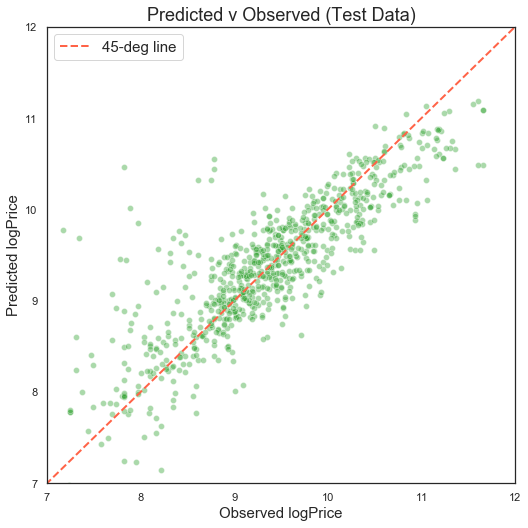

In [75]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
sns.scatterplot(x = y_test, y = y_hat, alpha = 0.4, color = 'tab:green')
plt.xlabel('Observed logPrice', fontsize = 15)
plt.ylabel('Predicted logPrice', fontsize = 15)
plt.xlim(7,12)
plt.ylim(7,12)
plt.title('Predicted v Observed (Test Data)', fontsize = 18)
plt.plot([0, 12], [0, 12], color = 'tomato', ls = '--', lw = 2, label = '45-deg line')
plt.legend(fontsize = 15)
plt.show()

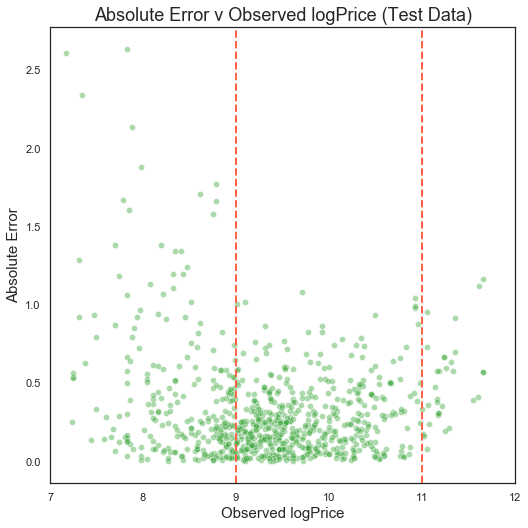

In [76]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_test, y = eval_df['Abs. Error'], alpha = 0.4, color = 'tab:green')
plt.axvline(x = 11, ls = '--', lw = 2, color = 'tomato', label = '11')
plt.axvline(x = 9, ls = '--', lw = 2, color = 'tomato', label = '9')
plt.title('Absolute Error v Observed logPrice (Test Data)', fontsize = 18)
plt.xlabel('Observed logPrice', fontsize = 15)
plt.ylabel('Absolute Error', fontsize = 15)
plt.xlim(7,12)
plt.show()

<br>The descriptives of the three bins we defined earlier are also similar. The most noticeable difference is the sign of the max_Residual for the higher price range. We had a negative max_Residual before; the sign this time is positive. This means that there is at least one instance where our model over-predicted in the higher price range.

In [77]:
bins = pd.DataFrame({'Observed_logPrice': y_test, 
                     'Residual': eval_df.Residual, 
                     'Abs. Error': eval_df['Abs. Error']})

In [78]:
bins_desc = bins.groupby(pd.cut(bins.Observed_logPrice, [7,9,11,12])).agg(count = ('Residual', 'count'), 
                                                                          mean_Residual = ('Residual', np.mean), 
                                                                          max_Residual = ('Residual', 'max'),
                                                                          mean_AbsError = ('Abs. Error', np.mean), 
                                                                          max_AbsError = ('Abs. Error', 'max'))
bins_desc

,count,mean_Residual,max_Residual,mean_AbsError,max_AbsError
Observed_logPrice,,,,,
"(7, 9]",251,0.266,2.635,0.418,2.635
"(9, 11]",499,-0.082,0.862,0.256,1.082
"(11, 12]",32,-0.497,0.078,0.502,1.165


<br>The "Residual Distribution" plot is also very similar to the one we got earlier as well. Here we still see that the Residuals are generally centered around zero, and that the distribution is right-skewed.

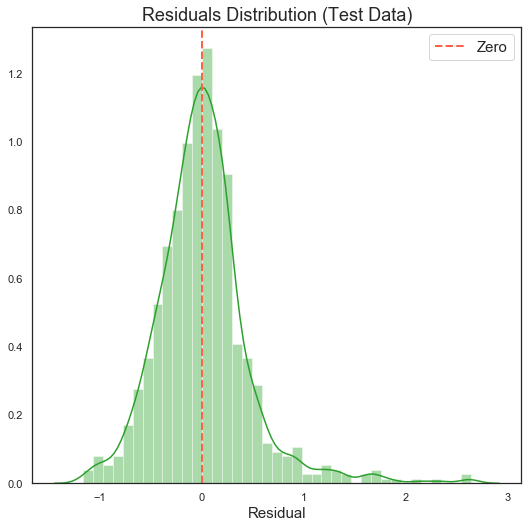

In [79]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
plt.title('Residuals Distribution (Test Data)', fontsize = 18)
plt.xlabel('Residual', fontsize = 15)
sns.distplot(eval_df.Residual, color = 'tab:green')
plt.axvline(x = 0, ls = '--', lw = 2, color = 'tomato', label = 'Zero')
plt.legend(fontsize = 15)
plt.show()

<br>Looking at the new "Residuals" plot, we see that we still have the same *cone* shape.

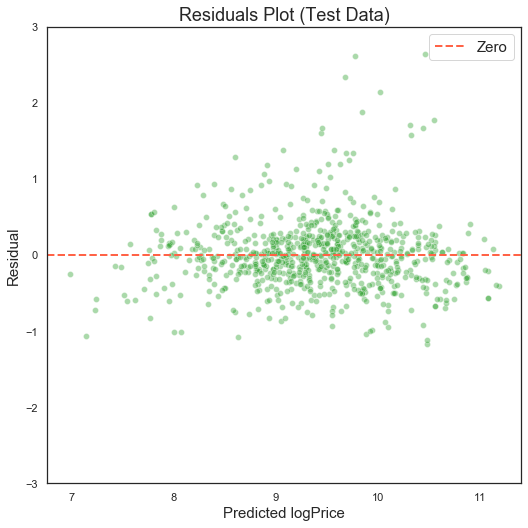

In [80]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
plt.title('Residuals Plot (Test Data)', fontsize = 18)
plt.xlabel('Predicted logPrice', fontsize = 15)
plt.ylabel('Residual', fontsize = 15)
plt.ylim(-3,3)
sns.scatterplot(x = y_hat, y = eval_df.Residual, alpha = 0.4, color = 'tab:green')
plt.axhline(y = 0, ls = '--', lw = 2, color = 'tomato', label = 'Zero')
plt.legend(fontsize = 15)
plt.show()

#### Summary of the Test

In summary, our model performed similary on test data as it did with the training data. There doesn't seem to be a major drop in performance based on the metrics we calculated (R-squared, Adj. R-squared, MAE, and RMSE). We can still say that our model performs best when predicting cars with an observed *logPrice* between 9 and 11. In addition, the same issue of non-homoscedastic and non-normal residuals is still present in the test data. As I mentioned before, a linear model may not be the best approach after all.

### <br>Profiles of the Lower-Priced, Mid-Range, and Higher-Priced Cars

Before we wrap-up this project, let's take a look one last time at the three *Observed logPrice* bins we mentioned: __(7, 9]__, __(9, 11]__, and __(11, 12]__. Let's make it easier for us to interpret the following analysis by taking the exponentials. We'll convert *logPrice* back into US Dollar values:<br> __(\\$0, \\$8104]__, __(\\$8104, \\$59875]__, and __(\\$59875__, *inf*__)__

In [81]:
e9 = np.exp(9)
e11 = np.exp(11)

print('e9 = $ {:,}'.format(ceil(e9)))
print('e11 = $ {:,}'.format(ceil(e11)))

e9 = $ 8,104
e11 = $ 59,875


Besides the prices, let's see if we could find similarities in the cars within each of these bins. Hopefully by doing so we'll have a better understanding of where our model shines and where it does not.

We've mentioned before that our models perform well in predicting prices for mid-priced cars. Let's see how these cars differ from low-priced and high-priced cars.

In [82]:
profile = data_fixEngineV.copy()
profile['Price_Range'] = np.where(profile.Price <= e9, 'Low', np.where(profile.Price > e11, 'High', 'Mid'))

#### Difference in Mileage

We see that *Mileage* for lower-priced cars are typically around 220k miles while higher-priced cars are almost all under 1k miles. Mid-range cars typically have *Mileage* around 170k.

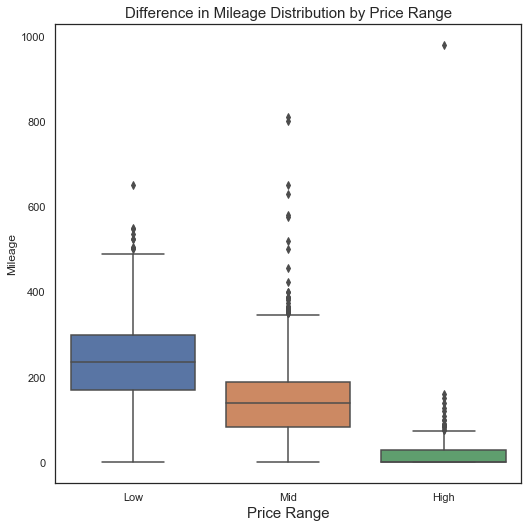

In [83]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.boxplot(x = profile.Price_Range, y = profile.Mileage)
plt.title('Difference in Mileage Distribution by Price Range', fontsize = 15)
plt.xlabel('Price Range', fontsize = 15)
plt.show()

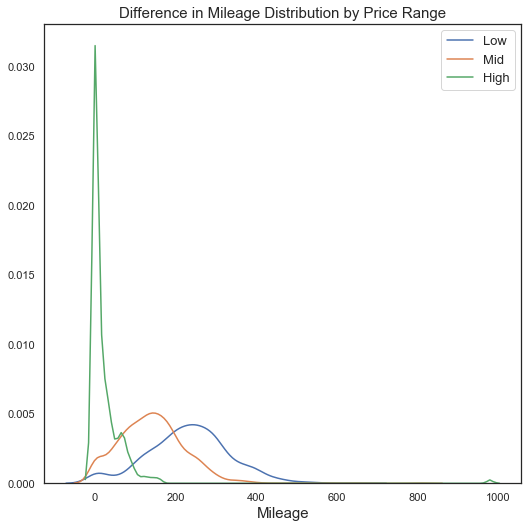

In [84]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.distplot(profile[profile.Price_Range == 'Low'].Mileage, label = 'Low', hist = False)
sns.distplot(profile[profile.Price_Range == 'Mid'].Mileage, label = 'Mid', hist = False)
sns.distplot(profile[profile.Price_Range == 'High'].Mileage, label = 'High', hist = False)
plt.legend(fontsize = 13)
plt.title('Difference in Mileage Distribution by Price Range', fontsize = 15)
plt.xlabel('Mileage', fontsize = 15)
plt.show()

#### Difference in Year

We ended up removing *Year* in our dataset but I believe it's still worth to look at the differences. We can see that higher-priced cars are relatively newer. Almost all cars in this range are 2016 models. Lower-priced cars, on the other hand, are typically have 2000 model cars. Middle-priced car are mostly between 2008 to 2011 models.

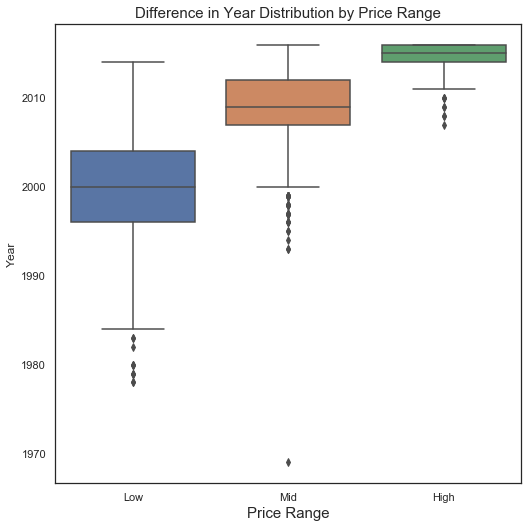

In [85]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.boxplot(x = profile.Price_Range, y = profile.Year)
plt.title('Difference in Year Distribution by Price Range', fontsize = 15)
plt.xlabel('Price Range', fontsize = 15)
plt.show()

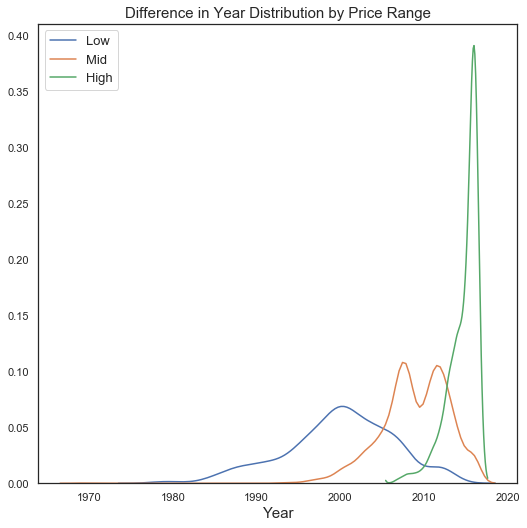

In [86]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.distplot(profile[profile.Price_Range == 'Low'].Year, label = 'Low', hist = False)
sns.distplot(profile[profile.Price_Range == 'Mid'].Year, label = 'Mid', hist = False)
sns.distplot(profile[profile.Price_Range == 'High'].Year, label = 'High', hist = False)
plt.legend(fontsize = 13)
plt.title('Difference in Year Distribution by Price Range', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.show()

#### Difference in Engine Volume

We saw a pretty stark difference between the three price ranges in the previous comparisons. It was easy to differentiate a mid-priced cars from lower-priced and higher-priced cars. When it comes to comparing the *Engine Volumes*, however, differentiating lower-priced cars from mid-priced cars is a little challenging. *Engine Volumes* of lower-priced and mid-priced cars blend around 1.5L to 2.2L. Higher-priced cars have a wider range of *Engine Volumes* but most of them are larger than 2.2L.

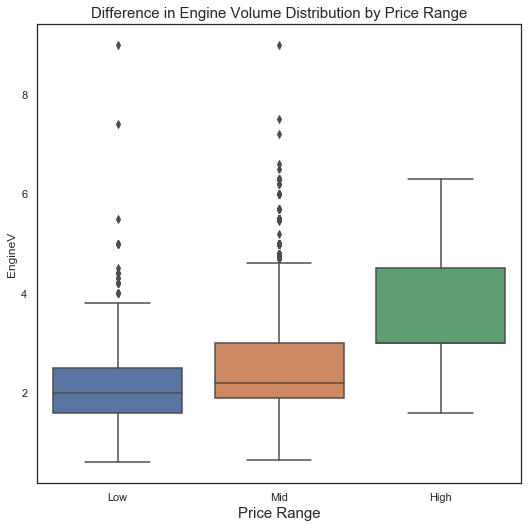

In [87]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.boxplot(x = profile.Price_Range, y = profile.EngineV)
plt.title('Difference in Engine Volume Distribution by Price Range', fontsize = 15)
plt.xlabel('Price Range', fontsize = 15)
plt.show()

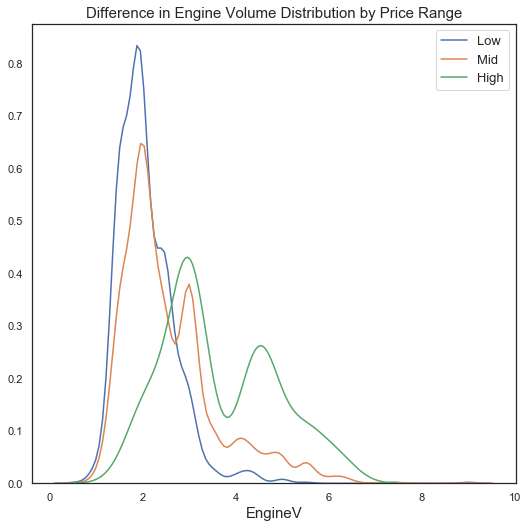

In [88]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.distplot(profile[profile.Price_Range == 'Low'].EngineV, label = 'Low', hist = False)
sns.distplot(profile[profile.Price_Range == 'Mid'].EngineV, label = 'Mid', hist = False)
sns.distplot(profile[profile.Price_Range == 'High'].EngineV, label = 'High', hist = False)
plt.legend(fontsize = 13)
plt.title('Difference in Engine Volume Distribution by Price Range', fontsize = 15)
plt.xlabel('EngineV', fontsize = 15)
plt.show()

#### Difference in Car Makes

Most of the cars in the mid-priced range are Volkswagens, Mercedes-Benz's, and Toyotas. Lower-priced cars are generally Volkswagens, Renaults, and Mercedes-Benz's. Finally, higher-priced cars are mostly Mercedes-Benz's, BMWs, and Toyotas.

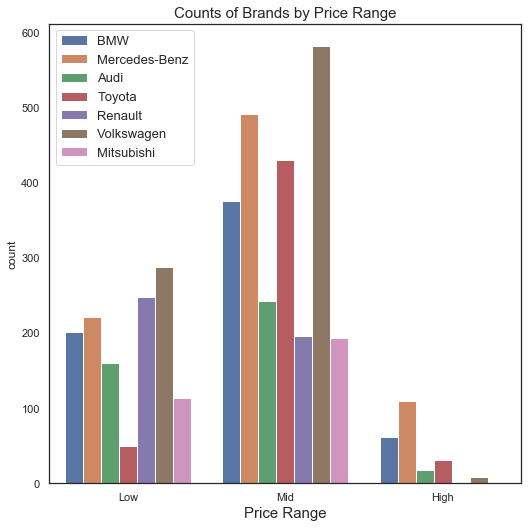

In [89]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.countplot(x = profile.Price_Range, hue = profile.Brand)
plt.legend(fontsize = 13)
plt.title('Counts of Brands by Price Range', fontsize = 15)
plt.xlabel('Price Range', fontsize = 15)
plt.show()

#### Difference in Body Types

Mid-priced cars are mostly sedans and crossovers. Higher-priced cars are almost all crossovers. Lower-priced cars, on the other hand, are mostly sedans.

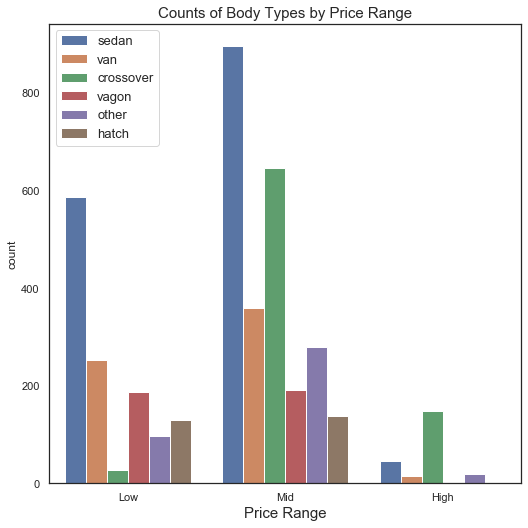

In [90]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.countplot(x = profile.Price_Range, hue = profile.Body)
plt.legend(fontsize = 13)
plt.title('Counts of Body Types by Price Range', fontsize = 15)
plt.xlabel('Price Range', fontsize = 15)
plt.show()

#### Difference in Engine Type

There doesn't seem to be major difference in the *Engine Types*. Almost cars in our dataset have either a Petrol or Diesel engine.

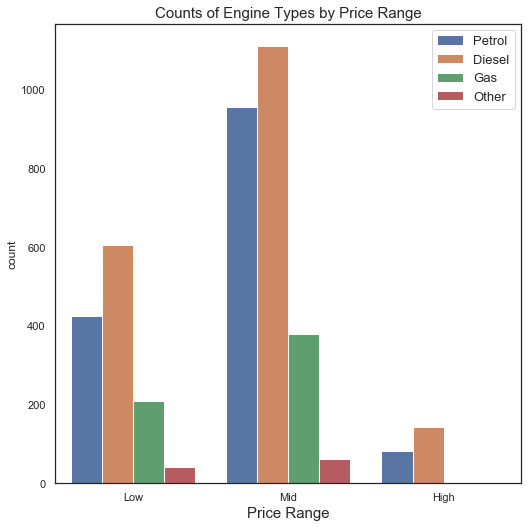

In [91]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.countplot(x = profile.Price_Range, hue = profile['Engine Type'])
plt.legend(fontsize = 13)
plt.title('Counts of Engine Types by Price Range', fontsize = 15)
plt.xlabel('Price Range', fontsize = 15)
plt.show()

#### Difference in Registration

Not much difference here either. Almost all cars in our dataset have a valid registration.

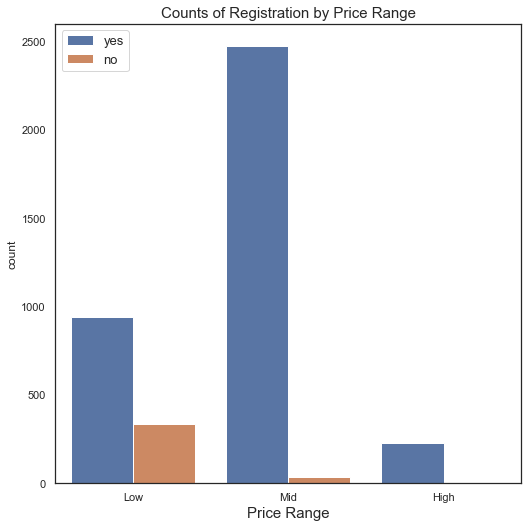

In [92]:
plt.figure(tight_layout = True, figsize = (7.5,7.5))
sns.countplot(x = profile.Price_Range, hue = profile.Registration)
plt.legend(fontsize = 13)
plt.title('Counts of Registration by Price Range', fontsize = 15)
plt.xlabel('Price Range', fontsize = 15)
plt.show()

### <br>Room for Improvement and Final Word

Admittedly, there are still a lot of advanced Linear Regression concepts out there that I have yet to learn. Machine learning is certainly a learning goal for me this year. I would like to revisit this project once I've become more versed in the other Machine Learning models. As I said before, it seems that a Linear Model may not be an ideal approach to this problem. I will try out other Machine Learning models once I become comfortable at building them.

However, there are still certain things that I would like to test before moving on to non-linear models:<br>
1. Filtering our test data to be mostly mid-priced cars to checking whether our model really does perform better at predicting mid-priced cars. For example, I could filter our test data to only contain Volkswagen, Mercedes-Benz, and Toyota cars and generate the "45-degree line" plot.
2. Explore other ways of removing outliers. In total, we removed 435 rows in our original dataset. Towards the end of our analysis we found out that we don't have a lot of data in the lower and higher price ranges. Perhaps most of the 435 rows we remove contain records for lower and higher priced cars. Having more data in those price ranges could improve the overall performance of our model.
3. Learn and test other ways to transform the data. We used a log-transformation on *Price* and *EngineV* to see a more linear relationship between the two. We weren't able to do a log-transformation on *Mileage* because of the zero values. Perhaps  there are other types of transformation that can help us here.
4. Use a different method of correcting the unusual *EngineV* values. Perhaps simply trimming off the dubious entries could help improve our model.
5. Dropping other variables besides *Year*. We saw that *Year* and *Mileage* had a relatively strong negative correlation. I would like to try keeping *Year* and removing *Mileage* instead, and see if it improves our model.

<br>If you read through this entire entry... thank you. I really do appreciate it. I believe this project does a great job of showing what I'm currently capable of when it comes to Machine Learning. I hope that you found potential in my current Machine Learning skillset.

If you only skimmed through, and only looked at the graphs... I don't blame you. It IS a long read! But I hope you found some potential in me nevertheless!

Like always, I provided a download link for the notebook file down below if you like to play around with the code. If you would like to reach out to me, you can contact me at J@iJeremiah.com.

<br>Cheers,
<br>Jeremiah